<a href="https://colab.research.google.com/github/Furank1/Estimaci-n-del-rendimiento-de-autom-viles/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

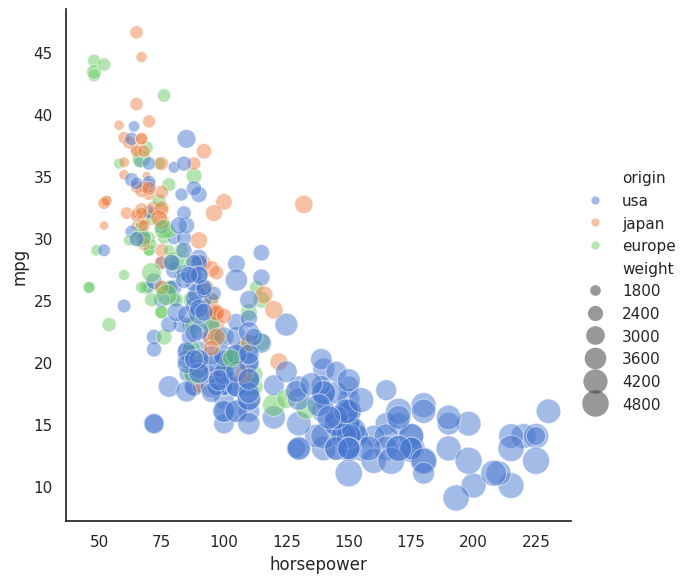

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="white")

# Load the example mpg dataset
df = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)



2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

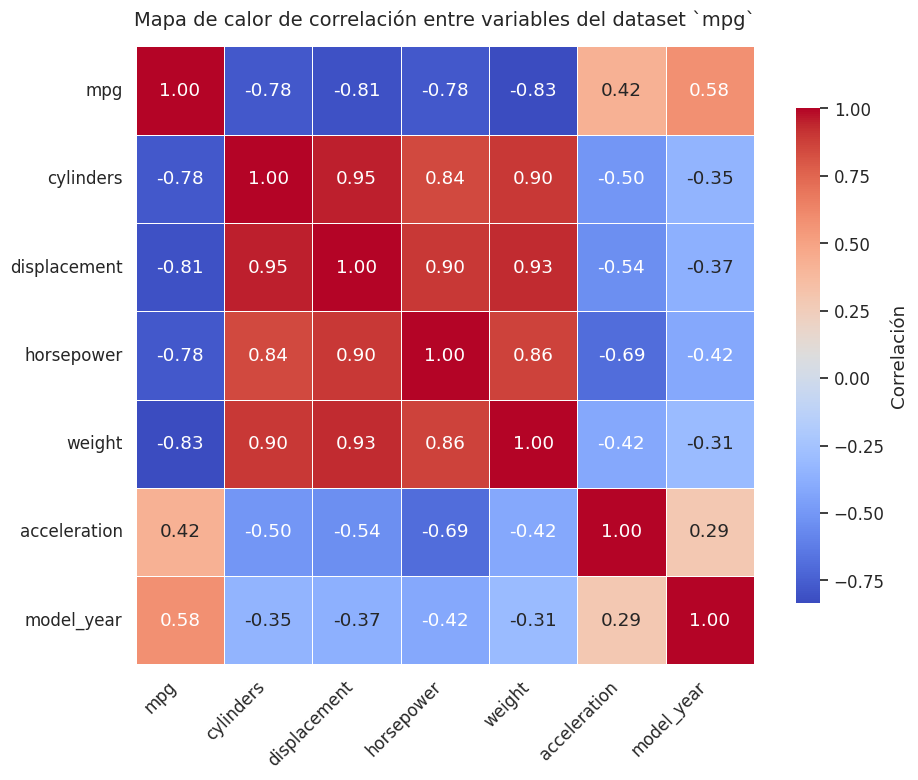

In [9]:
# Eliminar nulos
df = df.dropna()

# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)
sns.set_style("white")

# Heatmap con anotaciones
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlación"}
)

plt.title("Mapa de calor de correlación entre variables del dataset `mpg`", fontsize=14, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Eliminar valores nulos
df = df.dropna()

X = df[["horsepower"]]
y = df["mpg"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [11]:
 from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: 0.5659681822256185
MSE: 22.153237123863413


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


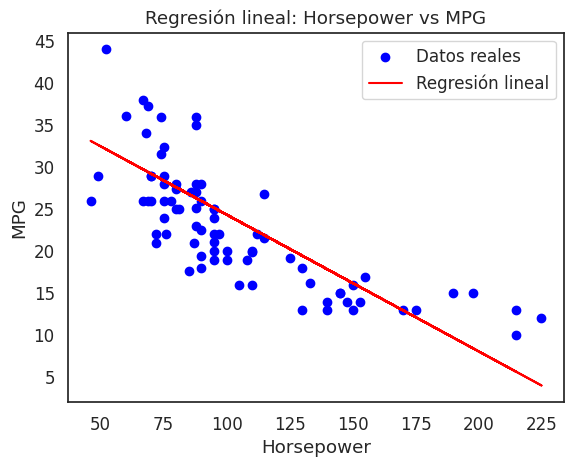

In [12]:
# Scatter plot
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Regresión lineal')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Regresión lineal: Horsepower vs MPG')
plt.legend()
plt.show()

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.